In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import phik 
from ydata_profiling import ProfileReport
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('data/Dataset_of_Diabetes .csv')
df


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [3]:

phik_corr = df.phik_matrix()

interval columns not set, guessing: ['ID', 'No_Pation', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']


In [4]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols

Index(['ID', 'No_Pation', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL',
       'LDL', 'VLDL', 'BMI'],
      dtype='object')

In [5]:
df_pt = df.copy()

In [6]:
pt = PowerTransformer(standardize=False)
pt.fit(df_pt[num_cols])
df_pt[num_cols] = pt.transform(df_pt[num_cols])
df_pt

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,38.644841,9.355867,F,2948.618630,1.152525,2.014395,3.560400,2.795500,0.542748,0.522965,0.912872,0.304233,10.702527,N
1,46.755220,9.940841,M,710.601121,1.137722,2.077911,3.560400,2.534788,0.698166,0.426357,1.194386,0.337837,10.386152,N
2,35.329532,10.246365,F,2948.618630,1.152525,2.014395,3.560400,2.795500,0.542748,0.522965,0.912872,0.304233,10.702527,N
3,44.978681,10.789031,F,2948.618630,1.152525,2.014395,3.560400,2.795500,0.542748,0.522965,0.912872,0.304233,10.702527,N
4,38.722023,9.940894,M,1190.313973,1.284611,2.014395,3.560400,3.143925,0.578565,0.375162,1.157936,0.264546,9.738775,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24.208089,12.254750,M,6377.117442,1.406786,2.161187,4.760438,4.311129,0.769421,0.439402,1.081610,0.337837,12.513376,Y
996,44.680919,12.833820,M,1039.317947,0.993075,2.071261,7.443930,2.744204,0.864567,0.352589,1.297684,0.659999,14.526955,Y
997,44.614467,10.789011,M,968.043103,1.284611,2.129275,4.595173,2.744204,0.611730,0.439402,1.297684,0.645462,11.745743,Y
998,16.758286,9.619093,M,1618.000930,1.221817,2.067822,4.595173,3.335454,0.829445,0.478743,1.452792,0.658529,15.403455,Y


In [7]:
sign = np.sign(df_pt[num_cols].corr(method='spearman'))
sign

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
ID,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0
No_Pation,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0
AGE,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
Urea,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
Cr,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0
HbA1c,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
Chol,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TG,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
HDL,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0
LDL,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0


In [8]:
phik_corr.loc[num_cols,num_cols] = phik_corr.loc[num_cols,num_cols] * sign

In [78]:
X = df.drop(columns='CLASS')
y = df['CLASS']
# le = LabelEncoder()
# y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)



ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

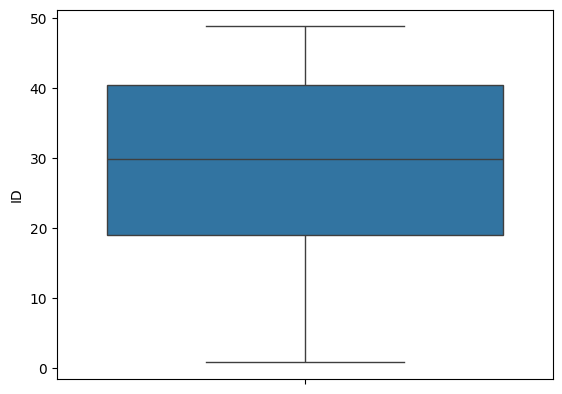

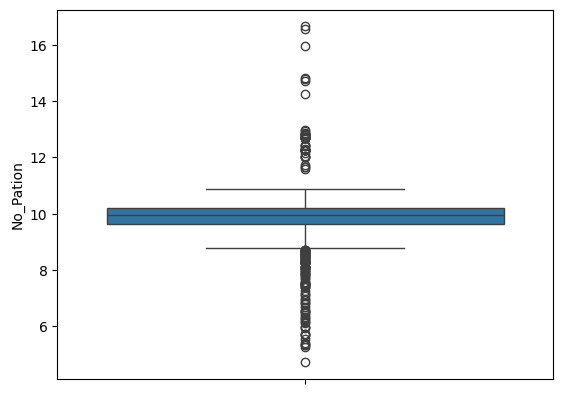

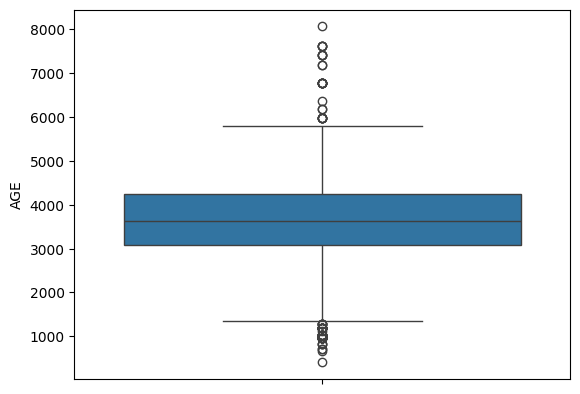

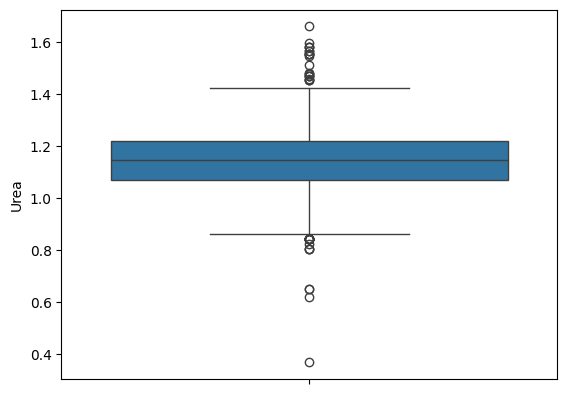

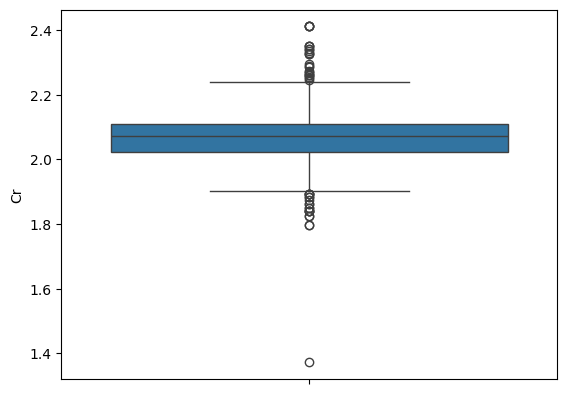

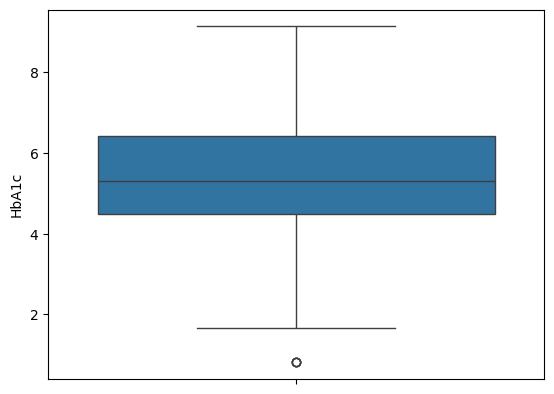

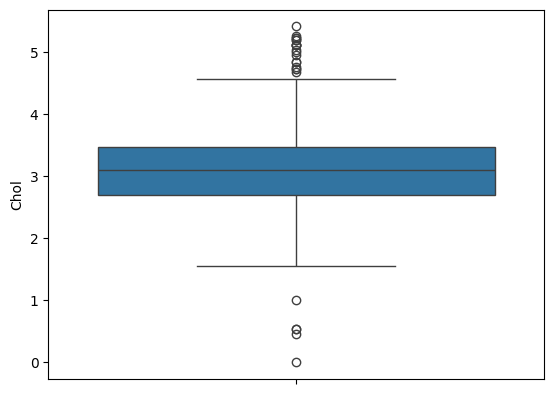

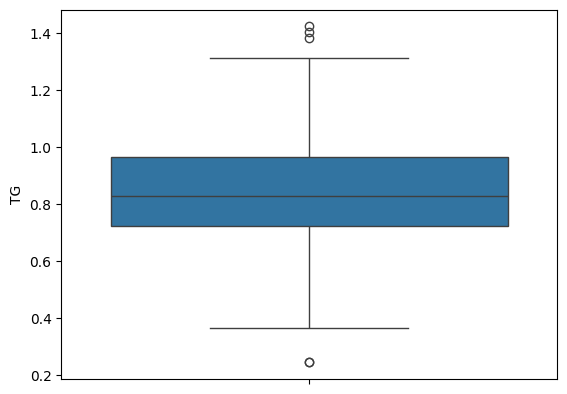

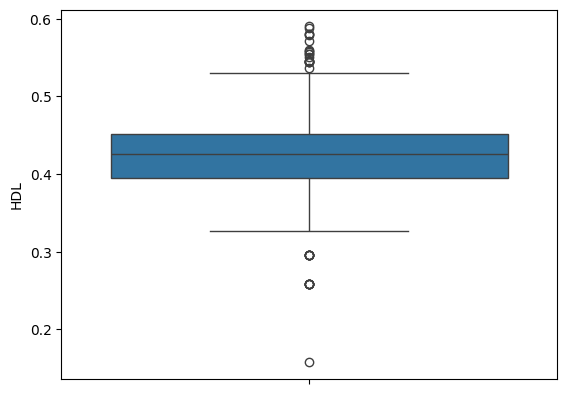

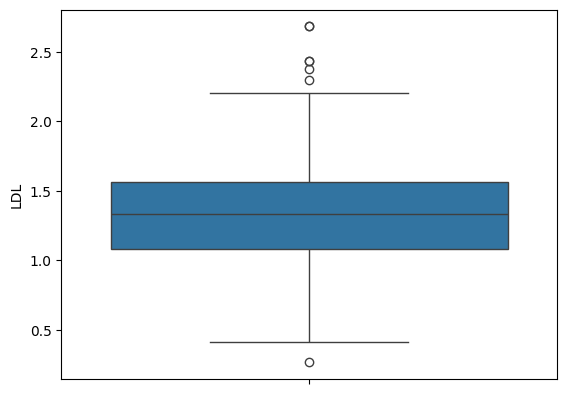

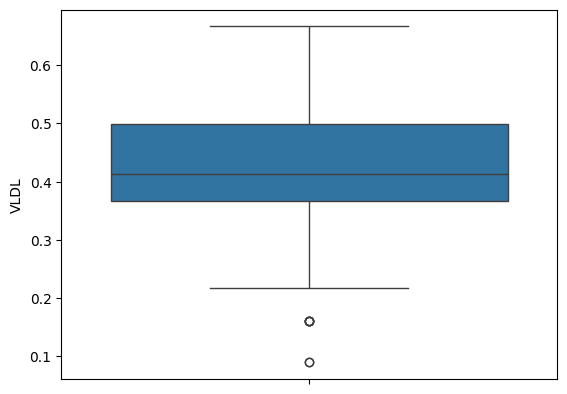

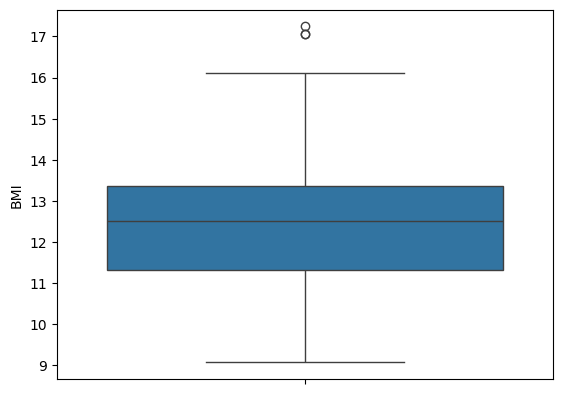

In [ ]:
df_pt.columns
for col in num_cols:
    sns.boxplot(df_pt[col])
    plt.show()

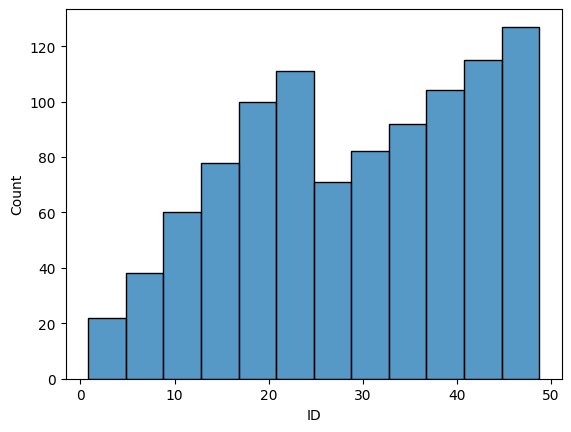

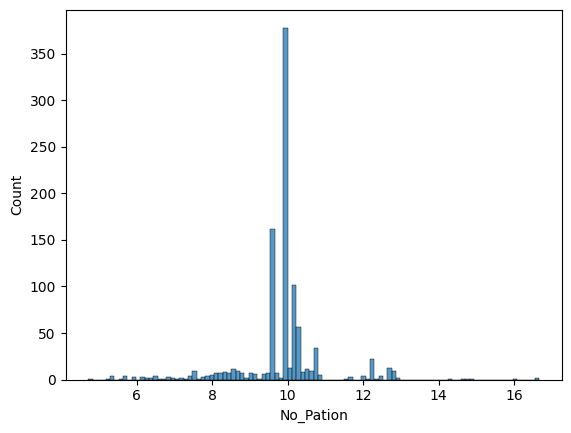

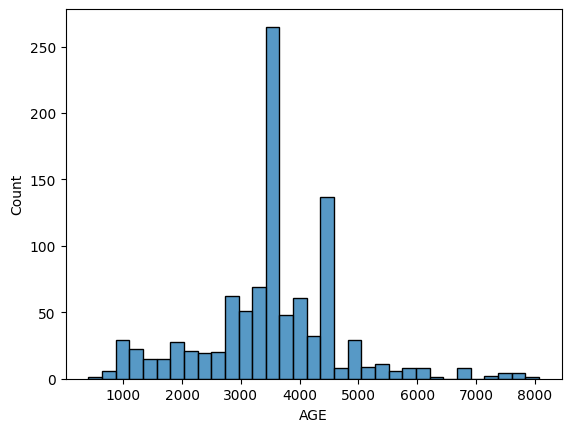

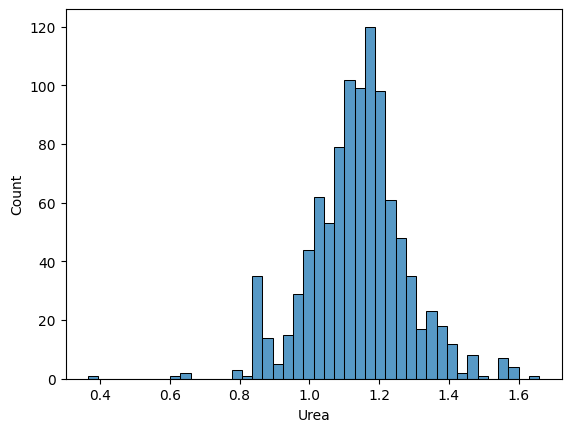

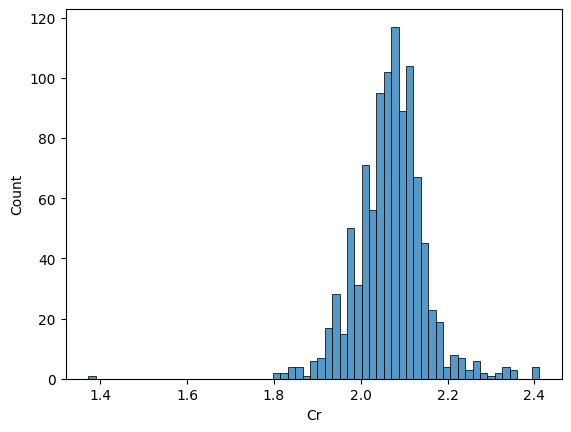

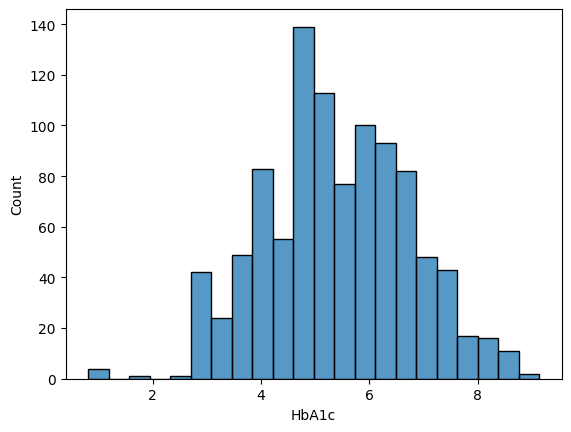

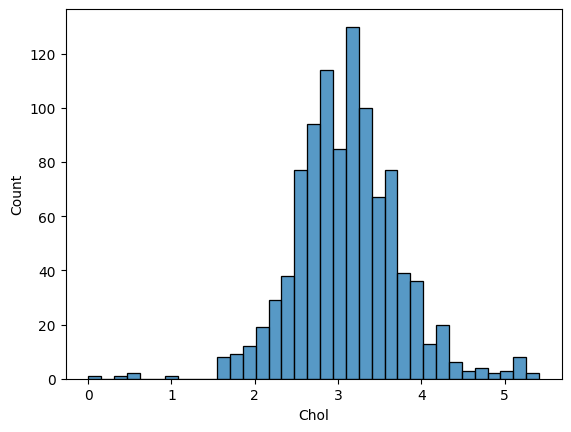

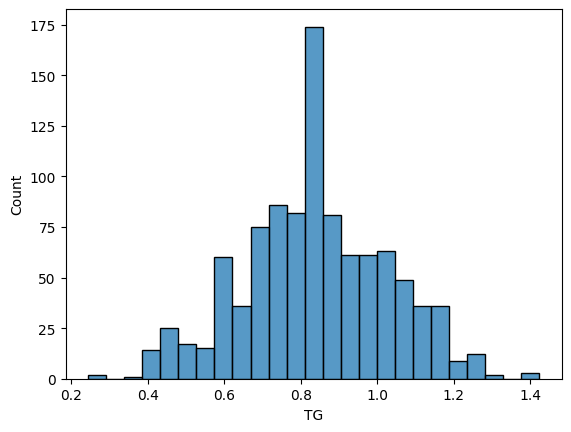

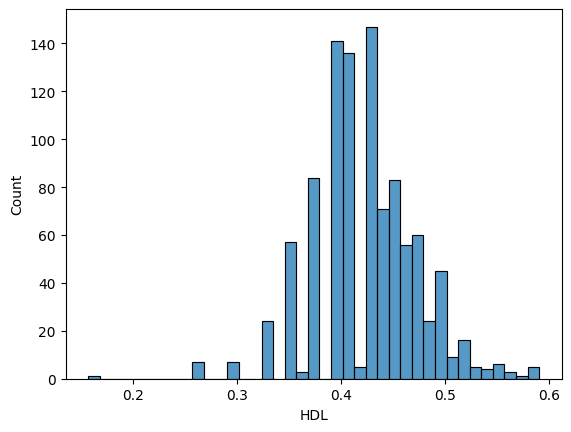

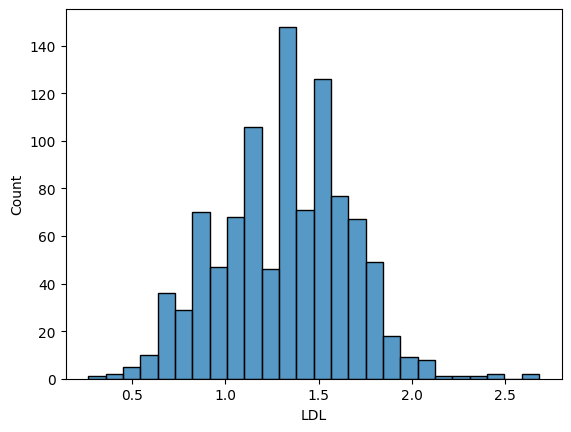

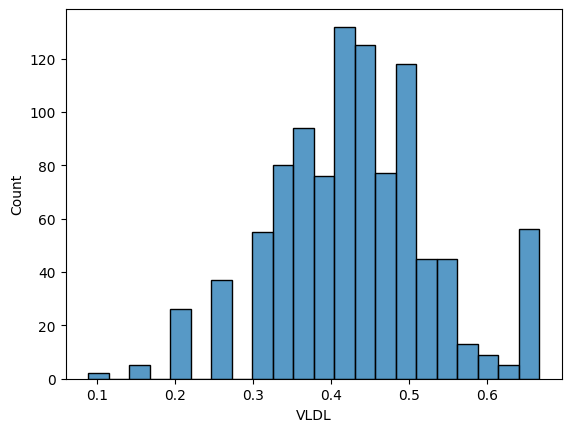

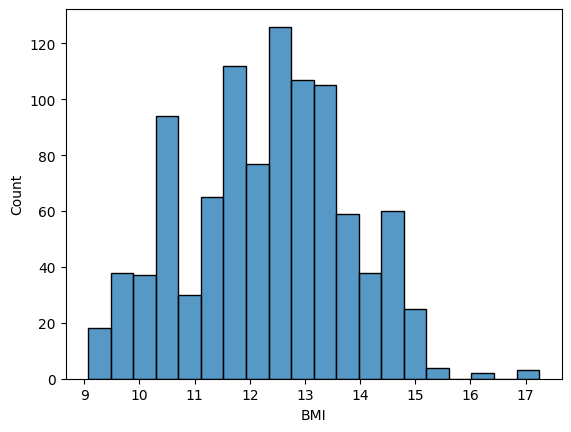

In [79]:
for col in num_cols:
    sns.histplot(df_pt[col])
    plt.show()

In [80]:
ohe_cols = X_train.select_dtypes(exclude=['float64', 'int64']).columns
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

In [81]:
stand_cols = ['HbA1c', 'Chol', 'TG', 'LDL', 'BMI']
rob_cols = ['Urea', 'Cr', 'HDL', 'VLDL']
mima_cols = ['AGE', 'No_Pation', 'ID']


In [82]:
lan = ['CLASS']

In [83]:
lan = LabelEncoder()
lan.fit(y_train)
y_train_xgb = lan.transform(y_train)
y_test_xgb = lan.transform(y_test)

In [84]:
y_train

29      N
535     Y
695     Y
557     Y
836     Y
       ..
106     P
270     Y
860     Y
435     Y
102    N 
Name: CLASS, Length: 800, dtype: object

In [85]:
y_train_xgb

array([0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 2, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0,
       3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3,
       3, 0, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 2, 3, 0, 3, 3,
       3, 4, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3,
       3, 2, 2, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0,
       0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,

In [86]:

ohe_pipe = Pipeline([
    ('ohe',OneHotEncoder(sparse_output=False))
])
stand_pipe = Pipeline([
    ('stand',StandardScaler())
])
rob_pipe = Pipeline([
    ('rob',RobustScaler())
])
mima_pipe = Pipeline([
    ('mima',MinMaxScaler())
])
scaler = ColumnTransformer([
    ('stand', stand_pipe, stand_cols),
    ('rob', rob_pipe, rob_cols),
    ('mima', mima_pipe, mima_cols)
])
num_pipe = Pipeline([
    ('num_cols', PowerTransformer(standardize=False)),
    ('scaler', scaler)
])

transform = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_cols),
    ('num', num_pipe, num_cols)
])



model = Pipeline([
    ('transform', transform),
    ('model', DecisionTreeClassifier())
    # ('model', DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=18, ccp_alpha=0.00002))
])


In [87]:
ohe_pipe = Pipeline([
    ('ohe',OneHotEncoder(sparse_output=False))
])
stand_pipe = Pipeline([
    ('stand',StandardScaler())
])
rob_pipe = Pipeline([
    ('rob',RobustScaler())
])
mima_pipe = Pipeline([
    ('mima',MinMaxScaler())
])
scaler = ColumnTransformer([
    ('stand', stand_pipe, stand_cols),
    ('rob', rob_pipe, rob_cols),
    ('mima', mima_pipe, mima_cols)
])
num_pipe = Pipeline([
    ('num_cols', PowerTransformer(standardize=False)),
    ('scaler', scaler)
])

transform = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_cols),
    ('num', num_pipe, num_cols)
])



xgb_model = Pipeline([
    ('transform', transform),
    ('xgb_model', xgb.XGBClassifier())
    # ('model', DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=18, ccp_alpha=0.00002))
])

In [88]:
ohe_pipe = Pipeline([
    ('ohe',OneHotEncoder(sparse_output=False))
])
stand_pipe = Pipeline([
    ('stand',StandardScaler())
])
rob_pipe = Pipeline([
    ('rob',RobustScaler())
])
mima_pipe = Pipeline([
    ('mima',MinMaxScaler())
])
scaler = ColumnTransformer([
    ('stand', stand_pipe, stand_cols),
    ('rob', rob_pipe, rob_cols),
    ('mima', mima_pipe, mima_cols)
])
num_pipe = Pipeline([
    ('num_cols', PowerTransformer(standardize=False)),
    ('scaler', scaler)
])

transform = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_cols),
    ('num', num_pipe, num_cols)
])



cbc = Pipeline([
    ('transform', transform),
    ('cbc', CatBoostClassifier())
    # ('model', DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=18, ccp_alpha=0.00002))
])

In [89]:
ohe_pipe = Pipeline([
    ('ohe',OneHotEncoder(sparse_output=False))
])
stand_pipe = Pipeline([
    ('stand',StandardScaler())
])
rob_pipe = Pipeline([
    ('rob',RobustScaler())
])
mima_pipe = Pipeline([
    ('mima',MinMaxScaler())
])
scaler = ColumnTransformer([
    ('stand', stand_pipe, stand_cols),
    ('rob', rob_pipe, rob_cols),
    ('mima', mima_pipe, mima_cols)
])
num_pipe = Pipeline([
    ('num_cols', PowerTransformer(standardize=False)),
    ('scaler', scaler)
])

transform = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_cols),
    ('num', num_pipe, num_cols)
])



mlgb = Pipeline([
    ('transform', transform),
    ('mlgb', lgb.LGBMClassifier())
])

In [90]:
# dt = OneVsRestClassifier(DecisionTreeClassifier())
# dt.fit(X_train, y_train)

xgb_model.fit(X_train, y_train_xgb)
cbc.fit(X_train, y_train)
mlgb.fit(X_train, y_train)

Learning rate set to 0.078231
0:	learn: 1.4087341	total: 49.4ms	remaining: 49.3s
1:	learn: 1.2646494	total: 81.1ms	remaining: 40.5s
2:	learn: 1.1443882	total: 93.3ms	remaining: 31s
3:	learn: 1.0404808	total: 106ms	remaining: 26.3s
4:	learn: 0.9433083	total: 120ms	remaining: 23.9s
5:	learn: 0.8667588	total: 163ms	remaining: 27s
6:	learn: 0.7999309	total: 219ms	remaining: 31.1s
7:	learn: 0.7343736	total: 251ms	remaining: 31.1s
8:	learn: 0.6766948	total: 262ms	remaining: 28.9s
9:	learn: 0.6320870	total: 286ms	remaining: 28.3s
10:	learn: 0.5885341	total: 337ms	remaining: 30.3s
11:	learn: 0.5502486	total: 370ms	remaining: 30.4s
12:	learn: 0.5149357	total: 414ms	remaining: 31.4s
13:	learn: 0.4872956	total: 423ms	remaining: 29.8s
14:	learn: 0.4594834	total: 460ms	remaining: 30.2s
15:	learn: 0.4327455	total: 508ms	remaining: 31.3s
16:	learn: 0.4125134	total: 549ms	remaining: 31.7s
17:	learn: 0.3924205	total: 613ms	remaining: 33.4s
18:	learn: 0.3727261	total: 657ms	remaining: 33.9s
19:	learn: 0

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['Gender'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('num_cols',
                                                                   PowerTransformer(standardize=False)),
                                                                  ('scaler',
                                                                   ColumnTransformer(transformers=[('stand',
                                                                                                    Pipeline(steps=[('stand',
                                                                                                                     StandardScaler())]),
                                                                                                    ['HbA1c',
                                                                                                     'Chol',
                                                                                                     'TG',
                                                                                                     'LDL',
                                                                                                     'BMI']),
                                                                                                   ('rob',
                                                                                                    Pipeline(steps=[('rob',
                                                                                                                     RobustScaler())]),
                                                                                                    ['Urea',
                                                                                                     'Cr',
                                                                                                     'HDL',
                                                                                                     'VLDL']),
                                                                                                   ('mima',
                                                                                                    Pipeline(steps=[('mima',
                                                                                                                     MinMaxScaler())]),
                                                                                                    ['AGE',
                                                                                                     'No_Pation',
                                                                                                     'ID'])]))]),
                                                  Index(['ID', 'No_Pation', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL',
       'LDL', 'VLDL', 'BMI'],
      dtype='object'))])),
                ('mlgb', LGBMClassifier())])

In [91]:
# model.estimators_


In [92]:
model.named_steps['model']

DecisionTreeClassifier()

In [93]:

# plt.figure(figsize=(15,15))
# plot_tree(model.named_steps['model'], filled=True, fontsize=6)
# plt.show()

In [94]:
# pd.DataFrame(model.predict_proba(X_test))

NotFittedError: Pipeline is not fitted yet.

In [95]:
pred_xgb = xgb_model.predict(X_test)
pred_pcp = cbc.predict(X_test)
pred_mlgb = mlgb.predict(X_test)

In [96]:
ac_xgb = accuracy_score(y_test_xgb, pred_xgb)
ac_cbc = accuracy_score(y_test, pred_pcp)
ac_lgb = accuracy_score(y_test, pred_mlgb)
print(f'''
xgb_model: {ac_xgb}

pcp_model: {ac_cbc}

lgb_model: {ac_lgb}
 ''')




xgb_model: 0.985

pcp_model: 0.99

lgb_model: 0.975
 


In [97]:
pr_xgb = precision_score(y_test_xgb, pred_xgb, average="weighted")
pr_pcp = precision_score(y_test, pred_pcp, average="weighted")
pr_lbg = precision_score(y_test, pred_mlgb, average="weighted")
print(f'''
xgb_model: {pr_xgb}

pcp_model: {pr_pcp}

lgb_model: {pr_lbg}
 ''')



xgb_model: 0.9800578034682081

pcp_model: 0.9852272727272728

lgb_model: 0.9720314876787345
 


c:\Users\iriivan\Desktop\Projects\machine_learning\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\iriivan\Desktop\Projects\machine_learning\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\iriivan\Desktop\Projects\machine_learning\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [98]:
re_xgb = recall_score(y_test_xgb, pred_xgb, average="weighted")
re_pcp = recall_score(y_test, pred_pcp, average="weighted")
re_lbg = recall_score(y_test, pred_mlgb, average="weighted")
print(f'''
xgb_model: {re_xgb}

pcp_model: {re_pcp}

lgb_model: {re_lbg}
 ''')



xgb_model: 0.985

pcp_model: 0.99

lgb_model: 0.975
 


In [102]:
pd.DataFrame(y_test_xgb).value_counts()


0
3    172
0     21
2      6
4      1
Name: count, dtype: int64

In [103]:
pd.DataFrame(y_train_xgb).value_counts()

0
3    668
0     81
2     47
4      3
1      1
Name: count, dtype: int64

Confusion matrix:
 [[ 20   0   1   0]
 [  0   6   0   0]
 [  1   0 171   0]
 [  0   0   1   0]]


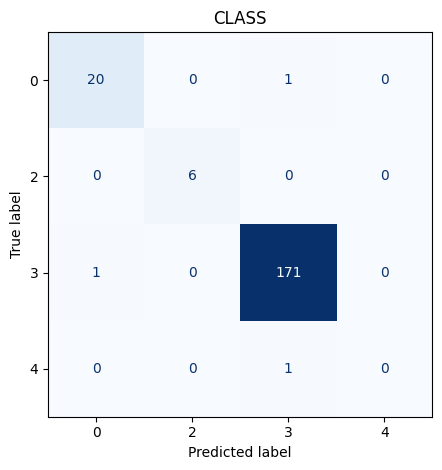

In [104]:
cm_xgb = confusion_matrix(y_test_xgb, pred_xgb)
print("Confusion matrix:\n", cm_xgb)

# 5. Optional: pretty plot (sklearn ≥ 0.24)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,
                              display_labels=[0,2,3,4])
                            #   display_labels=xgb_model.named_steps['xgb_model'].classes_)
disp.plot(cmap="Blues", colorbar=False)
plt.title("CLASS")
plt.tight_layout()
plt.show()

In [75]:
xgb_model.named_steps['xgb_model'].classes_

array([0, 1, 2, 3, 4])

In [ ]:
f1_xgb = f1_score(y_test_xgb,pred_xgb,average="weighted")
f1_pcp = f1_score(y_test,pred_pcp,average="weighted")
f1_lbg = f1_score(y_test,pred_mlgb,average="weighted")

print(f'''
xgb_model: {f1_xgb}

pcp_model: {f1_pcp}

lgb_model: {f1_lbg}
 ''')


xgb_model: 0.9825217391304348

pcp_model: 0.9875581395348837

lgb_model: 0.9727360248447205
 


In [115]:
(y_test == pred).sum()/len(pred)

np.float64(0.97)

In [116]:
171/len(pred)

0.855

In [30]:
# profile = ProfileReport(df)
# profile.to_file(output_file='output.html')

Summarize dataset:   5%|▌         | 1/19 [00:00<00:00, 18.52it/s, Describe variable: No_Pation]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]
